# Classer ses iris (KNN)

David Scanu 

* v3 - Feature Selection

---

## Contexte du projet

Une chaine de fleuriste aimerait pouvoir trier ses différentes espèces d'iris.
Réalisez un programme permettant de prédire l'espèce d'une iris à partir de la largeur et longueur de ses sépales et des pétales.

## Modalités pédagogiques

•	Travail individuel
•	deux jours de travail

## Critères de performance

•	Les données ont été analysées et il existe une trace de cette analyse exploratoire dans un jupyter-notebook
•	Un programme qui fonctionne sans bug, et qui classifie bien les iris (vous afficherez la matrice de confusion et l'accuracy obtenus sur la base Test)

## Modalités d'évaluation

Revue du code avec le formateur

## Livrables

Dépot Github

---

## Importer les bibliothèques

In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# import some data to play with
iris = datasets.load_iris() # nd.array

### Quel est notre Objectif ?

Compte tenu de : 
- **longueur des sépales**
- **largeur des sépales**
- **longueur des pétales**
- **largeur des pétales**
  
Classez la fleur d'iris dans l'une des trois espèces - **Setosa**, **Virginica** et **Versicolor**.

## Convertir le nd.array en DataFrame

In [2]:
# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Preparation du dataset
# Convert target numbers to "Iris Species"
def chng(target):
    if target == 0:
        return 'Setosa'
    elif target == 1:
        return 'Versicolor'
    elif target == 2:
        return 'Virginica'

iris_df['target'] = iris_df['target'].apply(chng)

In [5]:
# Renaming columns 'target'  to 'species'ArithmeticError
iris_df = iris_df.rename(columns={"target": "species"})

In [6]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


## Analyse statistique de base

### Moyennes et médianes

In [7]:
iris_df.groupby('species').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
Setosa                 5.006    5.0            3.428    3.4             1.462   
Versicolor             5.936    5.9            2.770    2.8             4.260   
Virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
Setosa       1.50            0.246    0.2  
Versicolor   4.35            1.326    1.3  
Virginica    5.55            2.026    2.0

Pour chaque caractère, la moyenne et la médiane sont relativement proches, ce qui indique une distribtuion normal de la population pour chaque caractère.

### Ecart-type par espèces

In [8]:
iris_df.groupby('species').std()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
Setosa,0.352490,0.379064,0.173664,0.105386
Versicolor,0.516171,0.313798,0.469911,0.197753
Virginica,0.635880,0.322497,0.551895,0.274650


### Boxplot

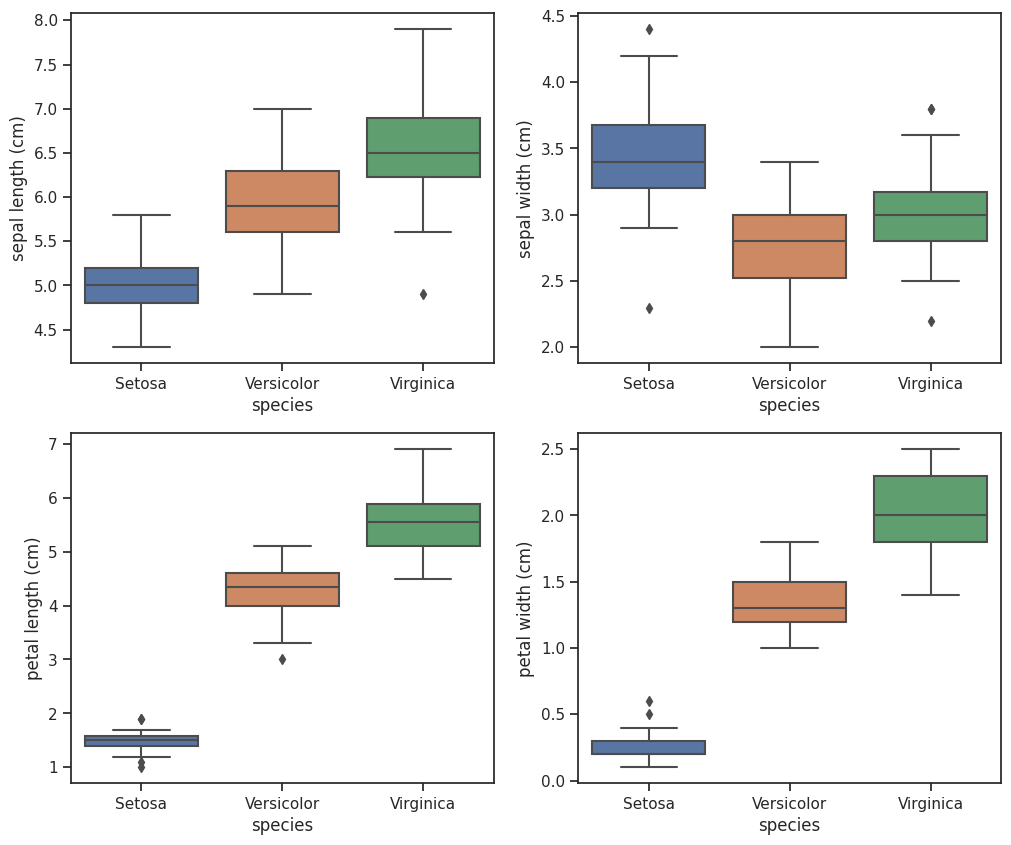

In [9]:
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal length (cm)',data=iris_df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal width (cm)',data=iris_df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal length (cm)',data=iris_df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal width (cm)',data=iris_df)
plt.show()

Les points isolés qui peuvent être vus dans les boîtes à moustaches ci-dessus sont les valeurs aberrantes dans les données. Comme ceux-ci sont très peu nombreux, cela n'aurait pas d'impact significatif sur notre analyse.

### Violin Plot

Montre la distribution des données sur plusieurs niveaux d'une (ou plusieurs) variables catégorielles (espèces de fleurs dans notre cas) de sorte que ces distributions puissent être comparées.

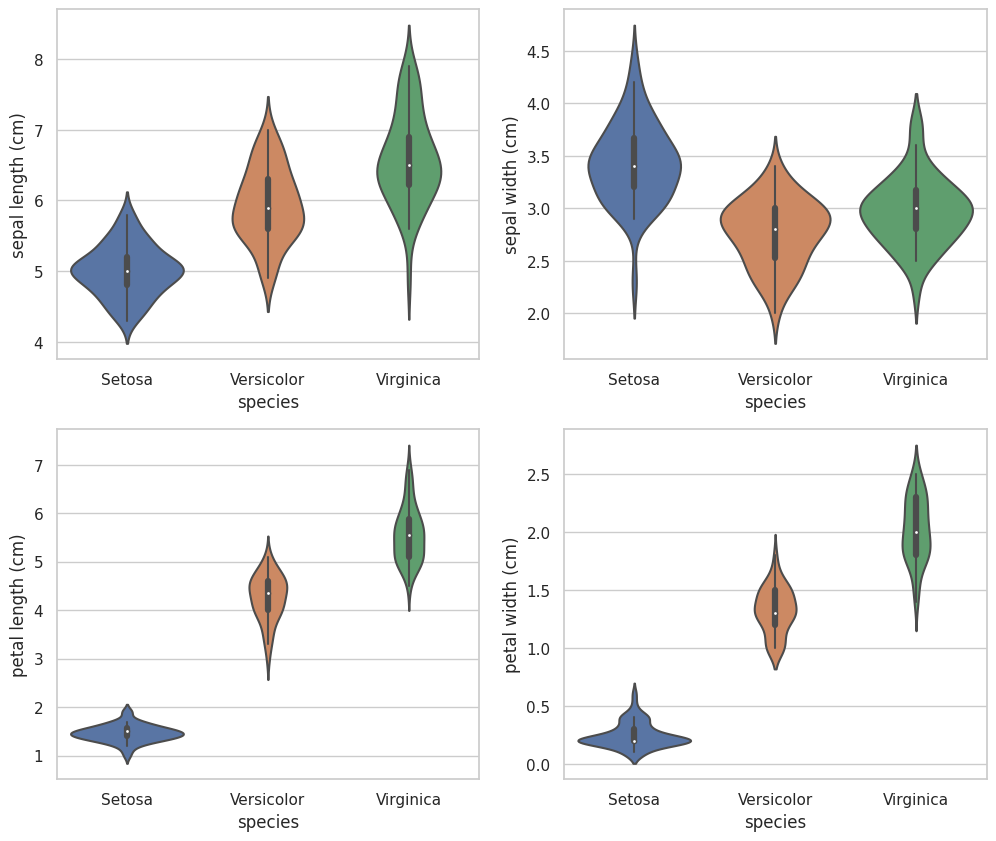

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal length (cm)',data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal width (cm)',data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal length (cm)',data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal width (cm)',data=iris_df)
plt.show()

### Pairplot

Premier reflexe, tracer un pairplot pour mettre en évidence répartitions et corrélations.

Grace au pairplot, nous pouvons mettre en évidence les caractères qui sont correlés et qui sont pertinents pour determiner la vartiété d'Iris.

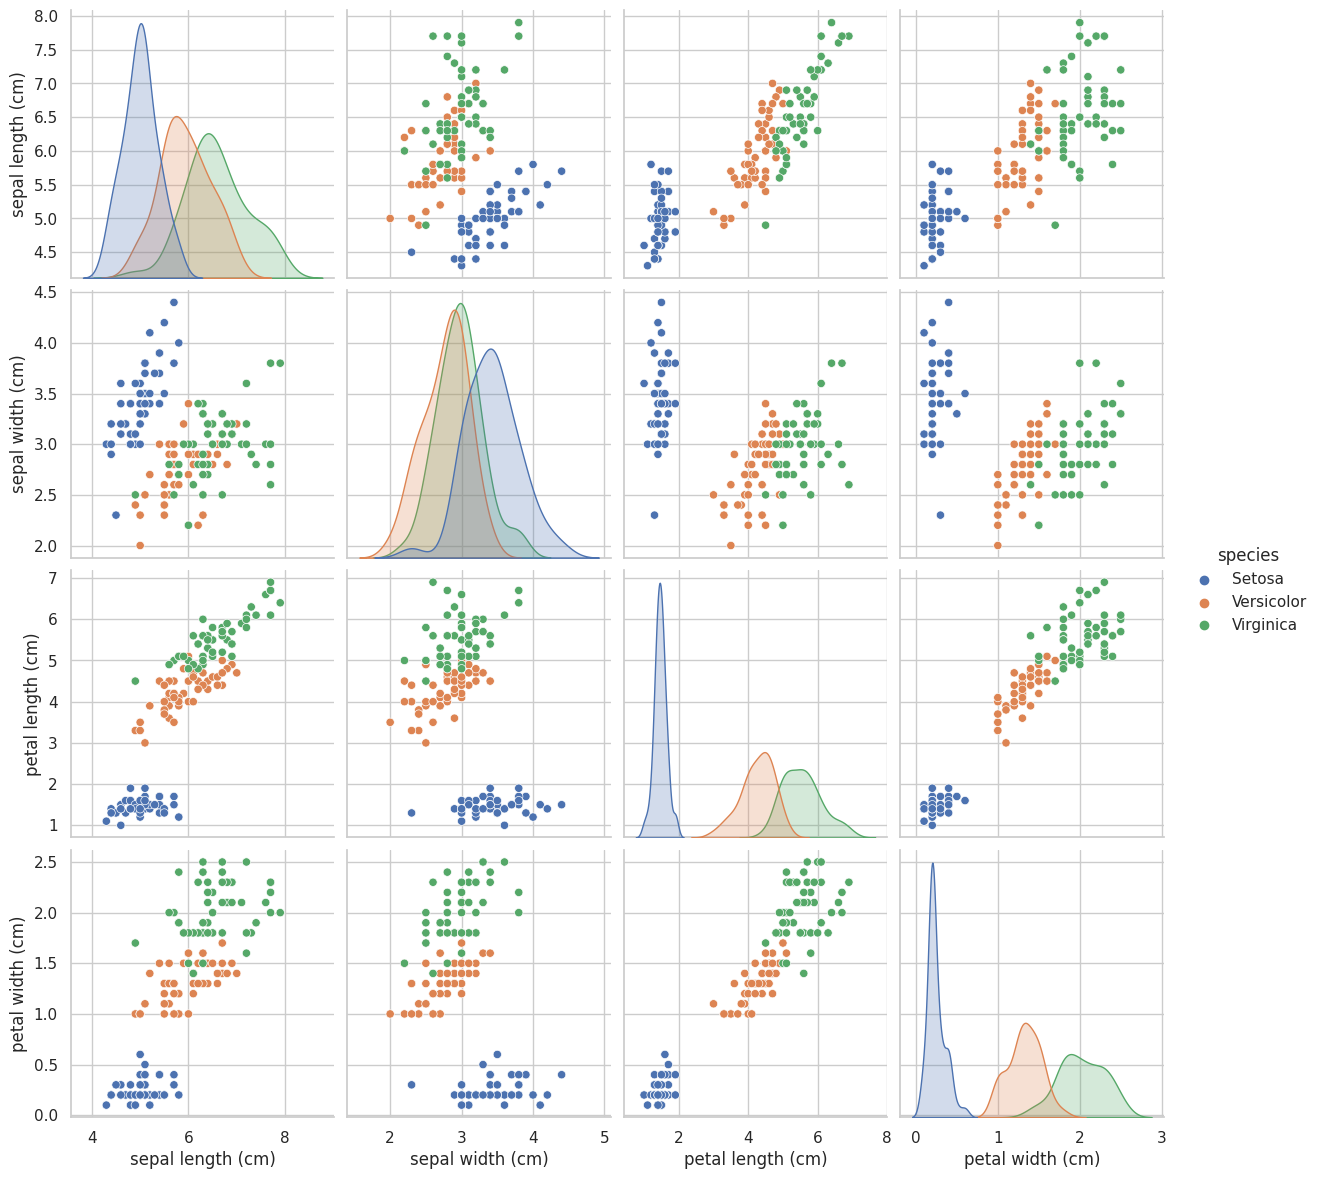

In [11]:
sns.pairplot(data=iris_df, hue="species", height=3)

### Analyse univariée

Probability Density Function (PDF) & Cumulative Distribution Function (CDF)

In [12]:
iris_setosa = iris_df[iris_df['species'] == "Setosa"]
iris_versicolor = iris_df[iris_df['species'] == "Versicolor"]
iris_virginica = iris_df[iris_df['species'] == "Virginica"]

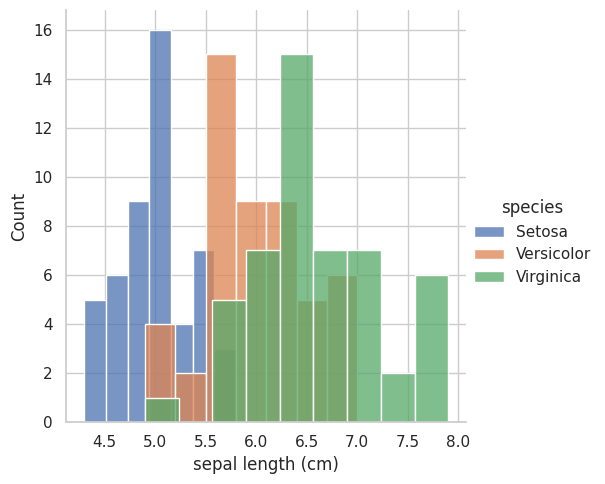

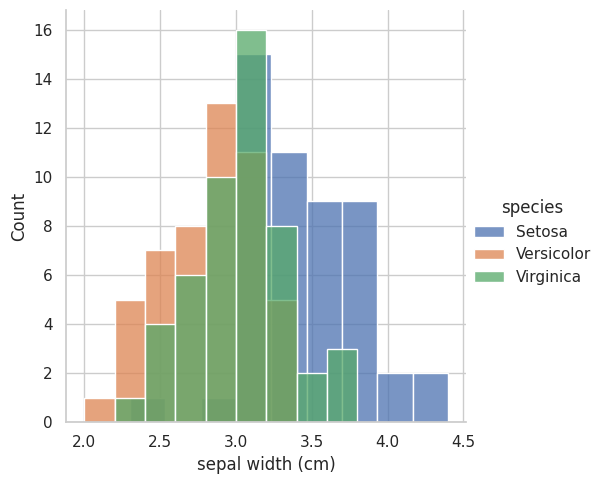

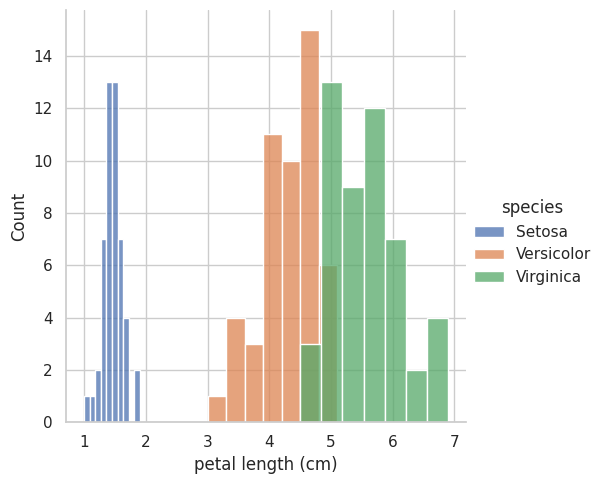

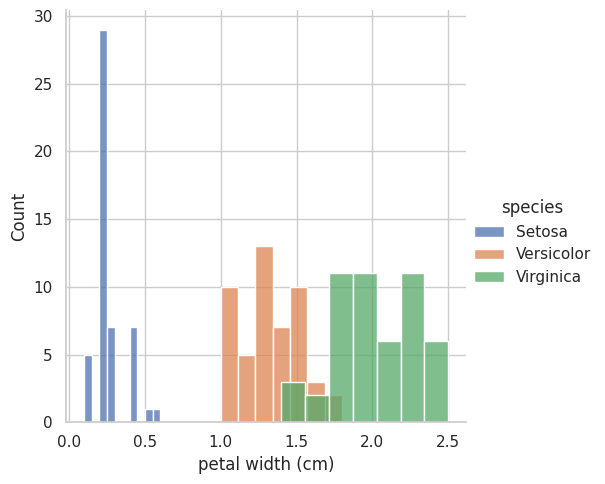

In [13]:
# sepal length
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "sepal length (cm)").add_legend();
# sepal width
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "sepal width (cm)").add_legend();
# petal length
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "petal length (cm)").add_legend();
# petal width
sns.FacetGrid(iris_df, hue="species", height=5).map(sns.histplot, "petal width (cm)").add_legend();
plt.show()

Sur le graphique 1 et 2, les répartitions se chevauchent beaucoup et ont ne peu pas réellement en déduire que la variable est determinante comme indication de la variété.

Sur le graphique 3, la densité de la longueur de "**petal length**" semble prometteur du point de vue de la classification univariée. Les espèces **Setosa** sont bien séparées de **Versicolor** et **Virginica**, bien qu'il y ait un certain chevauchement entre **Versicolor** et **Virginica**.

Sur le graphique 4, le tracé de densité de 'petal width' semble également bon. Il y a une légère intersection entre les espèces **Setosa** et **Versicolor**, tandis que le chevauchement entre **Versicolor** et **Virginica** est quelque peu similaire à celui de la longueur des pétales (Graphique 3).

Pour résumer, si nous devons choisir une caractéristique pour la classification, nous choisirons la **"petal length"** (Graphique 3) pour distinguer les espèces.

Si nous devons sélectionner deux caractéristiques, nous choisirons **'petal width'** comme deuxième caractéristique, mais encore une fois, il serait plus sage d'examiner les graphiques en paires (analyse bivariée et multivariée) pour déterminer quelles sont les deux caractéristiques les plus utiles dans classification.

### Analyse Bivariée

In [14]:
# Creating a DataFrame with the ndarray from load_iris()
iris_enc_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

#### Tableau de correlations

In [15]:
# Afficher les correlations
iris_enc_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


#### Heatmap

<AxesSubplot: >

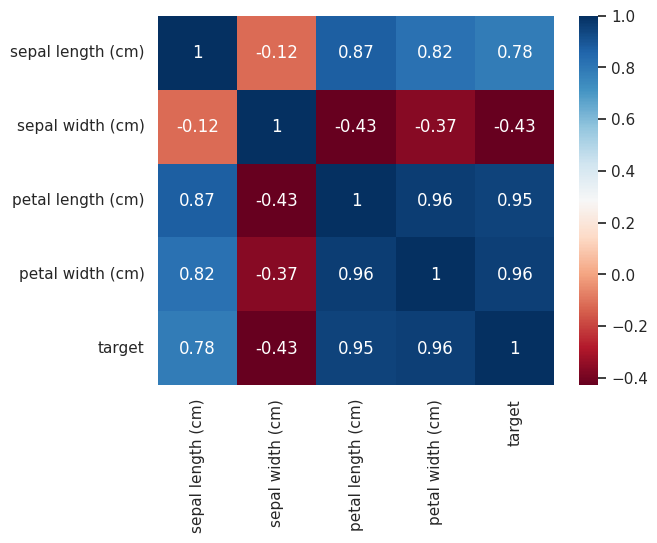

In [16]:
sns.heatmap(iris_enc_df.corr(), annot=True, cmap='RdBu')

On distingue une forte correlation entre la variété d'Iris et Petal Length et Petal Width. Ces deux criters seuls suffiraient à réaliser des prédictions.

#### Scatter Plot

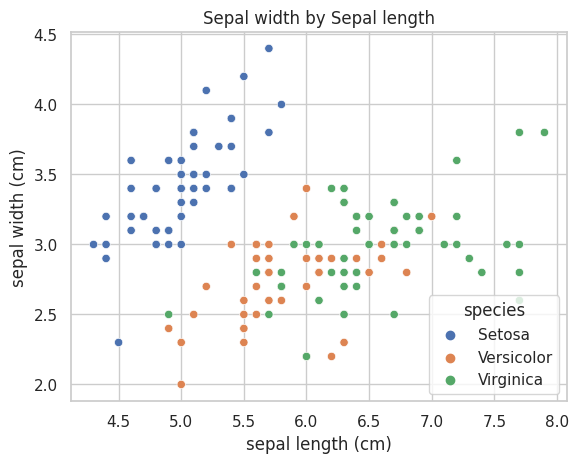

In [17]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title('Sepal width by Sepal length')
plt.show()

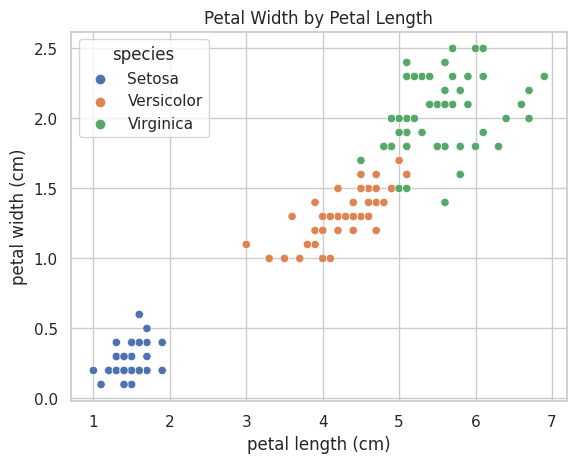

In [18]:
sns.scatterplot(data=iris_df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal Width by Petal Length')
plt.show()

On distingue bien sur ce graphique, que les elements sont répartis sur un ligne et que le caractère 'petal width' et 'petal length' permettent de discriminer la variété d'iris.

## Feature Selection

In [19]:
# Features
X = iris.data

# Target
y = iris.target

#### VarianceThreshold

Elimine les variables dont la **variance est inférieur à un certain seuil**.

In [20]:
# Variance des variables
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [21]:
from sklearn.feature_selection import VarianceThreshold

selector_vt = VarianceThreshold(threshold=0.2)
selector_vt.fit(X)
# Affiche un masque
selector_vt.get_support()


array([ True, False,  True,  True])

In [22]:
# Affiche les colonnes restantes
np.array(iris.feature_names)[selector_vt.get_support()]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [23]:
X_vt = selector_vt.transform(X)
X_vt[:10,:] # Affiche les 10 première ligne de notre ndarray

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1]])

#### SelectKbest

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

# Retourne 2 tableaux :
# - score test chi2, dépendance à y
# - P values
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

In [25]:
selector_kb = SelectKBest(chi2, k=2)
selector_kb.fit(X, y)
selector_kb.get_support() # Retourne une seule variable/colonne

array([False, False,  True,  True])

In [26]:
# Affiche les colonnes restantes
np.array(iris.feature_names)[selector_kb.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [27]:
X_kb = selector_kb.transform(X)
X_kb[:10] # Affiche les 10 première ligne de notre ndarray

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

#### SelectFromModel

Entraine un estimateur puis selectionne les **variables** les plus importantes pour cet estimateur. Compatible avec les estimateurs qui développent une fonction paramétrée *(Ne fonctionne pas avec Knn)*.

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

selector_sfm = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector_sfm.fit(X, y)
selector_sfm.get_support()

array([False, False,  True,  True])

In [29]:
# Affiche les colonnes restantes
np.array(iris.feature_names)[selector_sfm.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')

In [30]:
X_sfm = selector_sfm.transform(X)
X_sfm[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [31]:
# Matrice coefficient de 3 x 4
selector_sfm.estimator_.coef_

array([[  8.64029104,  27.2851296 , -40.01819009, -17.73533424],
       [ -5.48888269, -58.79616709,  22.88584985, -54.14457159],
       [-81.28026953, -75.17372078, 130.76437145, 131.39608339]])

In [32]:
# Le selecteur selectionne les variables > à ce chiffre
selector_sfm.estimator_.coef_.mean(axis=0).mean()

-0.9721175565229512

#### RFE + RFECV

Eliminent les variables les moins importantes de façon **récursive**.

Un estimateur est entrainé plusieurs fois, après chaque entrainement, des features sont éliminées sur la base de **coefficients** les plus faibles de l'estimateur.



In [33]:
from sklearn.feature_selection import RFE, RFECV

selector_RFECV = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=2, cv=5)
selector_RFECV.fit(X, y)
selector_RFECV.ranking_


array([2, 1, 1, 1])

In [34]:
selector_RFECV.cv_results_

{'mean_test_score': array([0.8       , 0.84666667, 0.77333333]),
 'std_test_score': array([0.10540926, 0.08055364, 0.1289272 ]),
 'split0_test_score': array([0.73333333, 0.73333333, 1.        ]),
 'split1_test_score': array([0.93333333, 0.8       , 0.8       ]),
 'split2_test_score': array([0.86666667, 0.9       , 0.76666667]),
 'split3_test_score': array([0.83333333, 0.83333333, 0.63333333]),
 'split4_test_score': array([0.63333333, 0.96666667, 0.66666667])}

In [35]:
selector_RFECV.get_support()

array([False,  True,  True,  True])

In [36]:
# Affiche les colonnes restantes
np.array(iris.feature_names)[selector_RFECV.get_support()]

array(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')

In [37]:
X_RFECV = selector_RFECV.transform(X)
X_RFECV[:10]

array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1]])

### Préparations des données

#### Nettoyage

il n'y a pas de valeurs manquantes dans le jeu de données.

In [38]:
# Y-a-t il des valuers manquantes ?
print(iris_df.isnull().values.any())

False


In [39]:
print(iris_df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


#### Outliers

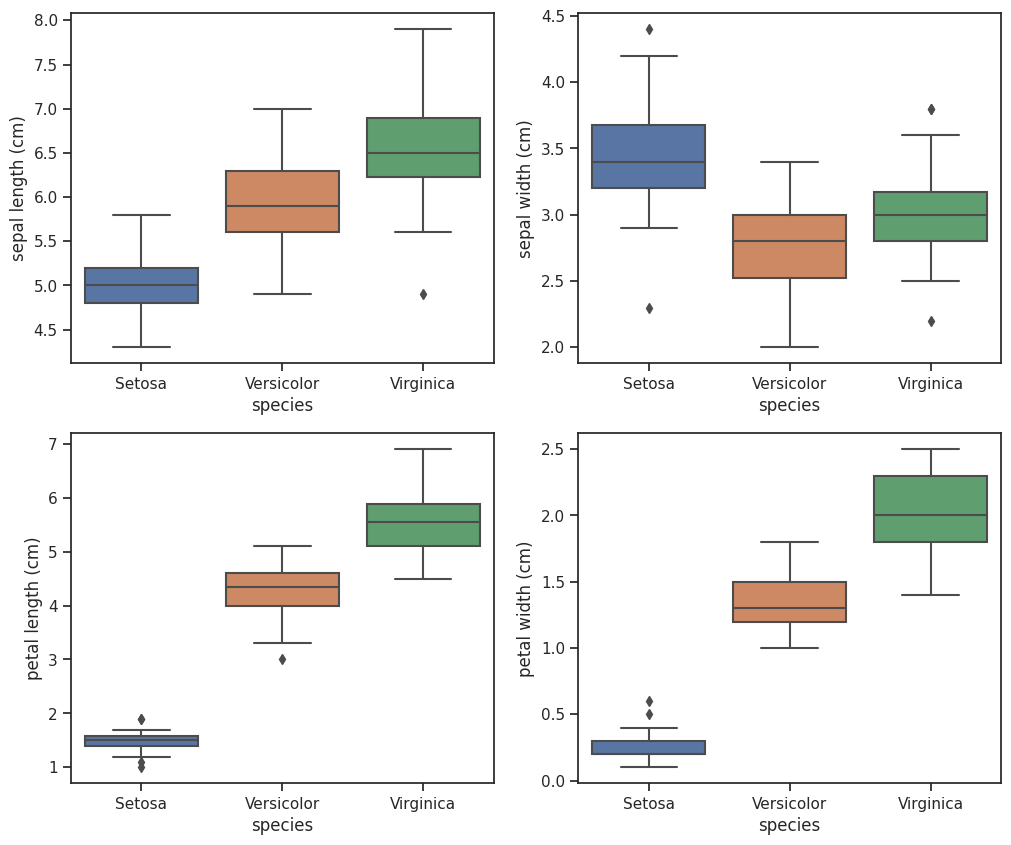

In [40]:
# Visualisation des outliers avec boxplot()
sns.set(style="ticks") 
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal length (cm)',data=iris_df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal width (cm)',data=iris_df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal length (cm)',data=iris_df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal width (cm)',data=iris_df)
plt.show()

Il y a très peu d'**outliers**. Ils ne seront pas génants pour l'entrainement de notre modèle.

#### Equilibre

Les cibles du jeu de données sont **bien équilibrées** puisqu'elles sont au nombre de 50 chacunes.

In [41]:
iris_df['species'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: species, dtype: int64

### Encoder les données

Les données contenues dans le **ndarray** récupérées avec **load_iris()** sont toutes numériques et ne nécessitent pas d'encodage.

### Séparer les données

In [42]:
from sklearn.model_selection import train_test_split

# Features
X_train, X_test, y_train, y_test = train_test_split(X_kb, y, test_size=0.2, random_state=3)

print(f"Nombre d'exemples d'entrainement X : {X_train.shape[0]}")
print(f"Nombre d'exemples de test X : {X_test.shape[0]}")
print(' ')
print(f"Nombre d'exemples d'entrainement Y : {y_train.shape[0]}")
print(f"Nombre d'exemples de test Y : {y_test.shape[0]}")

Nombre d'exemples d'entrainement X : 120
Nombre d'exemples de test X : 30
 
Nombre d'exemples d'entrainement Y : 120
Nombre d'exemples de test Y : 30


### Mise à l'échelle

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [44]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_minmaxscaler = min_max_scaler.fit_transform(X_train)
X_test_minmaxscaler = min_max_scaler.transform(X_test)

In [45]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
X_train_robscaler = robust_scaler.fit_transform(X_train)
X_test_robscaler = robust_scaler.transform(X_test)

### KNeighborsClassifier

#### Modèle KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
# Nous entrainons notre modèle avec les données d'entrainements (standardisées)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaler, y_train)
print('Train Score : ', model.score(X_train_scaler, y_train))
print('Test Score : ', model.score(X_test_scaler, y_test))

Train Score :  0.9916666666666667
Test Score :  0.9666666666666667


#### Cross-validation

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut, StratifiedShuffleSplit

# Choix de la méthode de validation croisée (échantillonage)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
# cv = LeaveOneOut()

cross_val_res = cross_val_score(model, X_train_scaler, y_train, cv=cv, scoring='accuracy')
print(cross_val_res)

[0.96666667 0.95       0.98333333 0.91666667 0.93333333]


In [48]:
cross_val_res.mean()

0.95

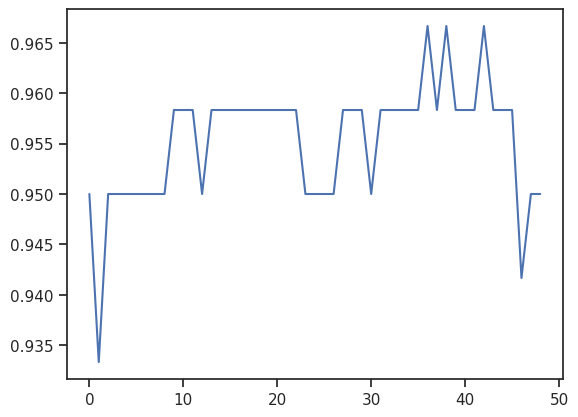

In [49]:
# Cross-validation for each k value
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_scaler, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

#### Validation Curve

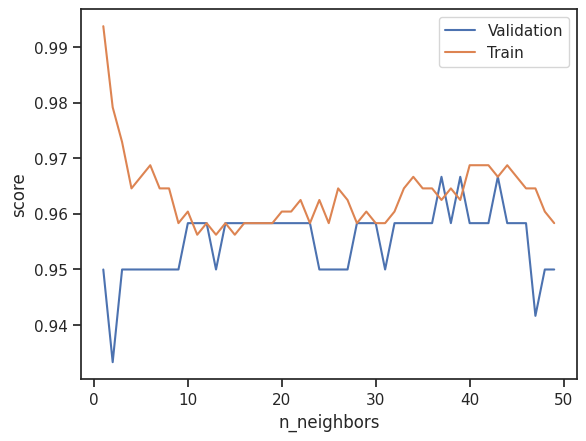

In [50]:
from sklearn.model_selection import validation_curve

k = np.arange(1, 50)
train_score, val_score = validation_curve(KNeighborsClassifier(), X_train_scaler, y_train, param_name='n_neighbors', param_range=k, cv=5)

plt.plot(k, val_score.mean(axis=1), label="Validation")
plt.plot(k, train_score.mean(axis=1), label="Train")
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

#### Grid Search CV

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1, 20), 'metric' : ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Afficher le meilleur score

In [52]:
grid.best_score_

0.9583333333333334

Afficher les paramètres donnant les meilleures performances

In [53]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 10}

Sauvegarder le meilleur modèle

In [54]:
# Best model
model_best = grid.best_estimator_

Tester le nouveau modèle sur les données de test

In [55]:
# Score du meilleur modèle
model_best.score(X_test_scaler, y_test)

0.9666666666666667

### Matrice de confusion

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = model_best.predict(X_test_scaler)
confusion_matrix = confusion_matrix(y_test, y_pred)


In [57]:
data = {'prediction': y_pred, 'actual': y_test}
df = pd.DataFrame(data)
contingency_matrix = pd.crosstab(df['prediction'], df['actual'])
print(contingency_matrix)

actual       0   1  2
prediction           
0           10   0  0
1            0  10  1
2            0   0  9


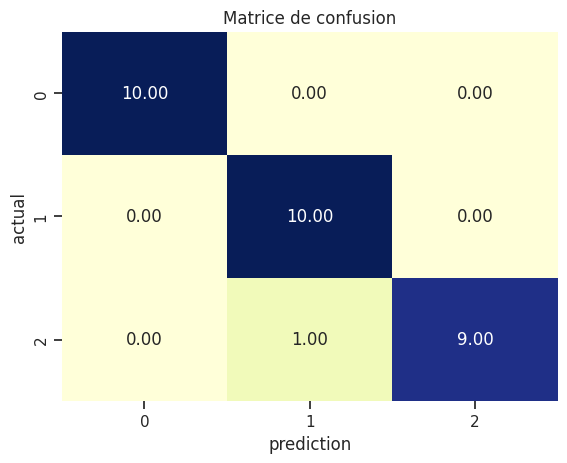

In [58]:
sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)
plt.title('Matrice de confusion')
plt.show()

#### Learning Curve

/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/home/david/workspace/py-sql/venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 226, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/ho

[ 9 19 28 38 48 57 67 76 86 96]


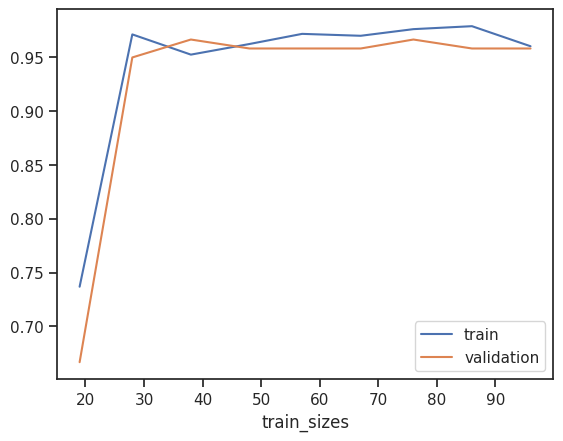

In [59]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model_best, X_train_scaler, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()